In [1]:
import numpy as np
import starry

import theano
theano.config.gcc__cxxflags += " -fexceptions"

starry.config.lazy = False
starry.config.quiet = True

In [ ]:
#starry.Map.spot
#spot(contrast=1.0,radius=None,lat=0.0,lon=0.0)

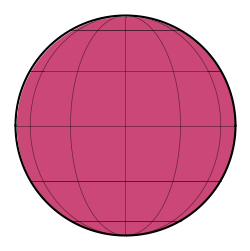

In [ ]:
# Adding a simple spot

#Create a dummy map
map0 = starry.Map(ydeg=1)
map0.show()


In [3]:
# Now let’s instantiate a very high degree map and add a spot with a contrast of 25% and a radius of 15∘ at latitude/longitude (0,0):

contrast = 0.25
radius = 15
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius)

map.show(theta=np.linspace(0, 360, 50))

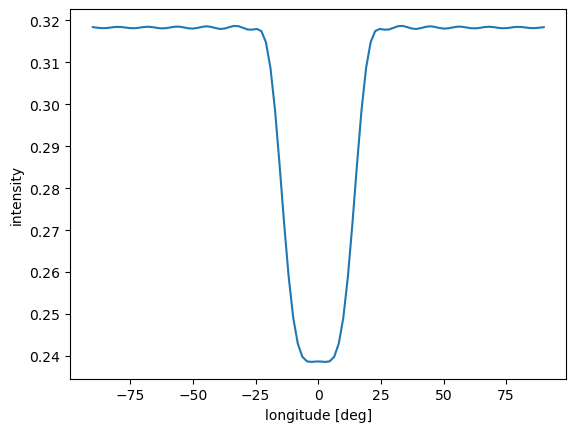

In [5]:
import matplotlib.pyplot as plt
# Lets look at what the spot contrast implies for the intensity of the points

lon = np.linspace(-90, 90, 100)
plt.plot(lon, map.intensity(lon=lon))
plt.xlabel("longitude [deg]")
plt.ylabel("intensity")

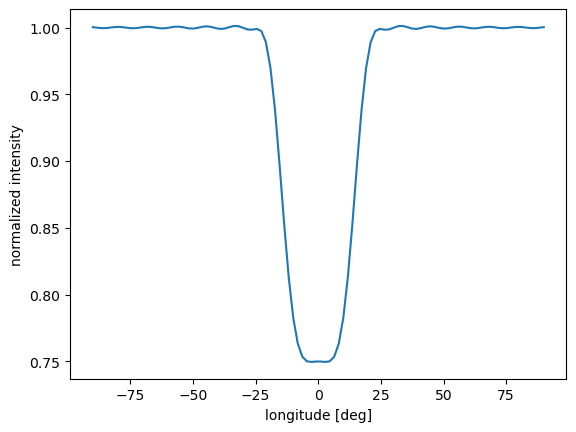

In [6]:
# If we normalize so that the max is 1
plt.plot(lon, np.pi * map.intensity(lon=lon))
plt.xlabel("longitude [deg]")
plt.ylabel("normalized intensity");

Extra: Trying to make a map with several spots

In [28]:
# Now let’s instantiate a very high degree map and add a spot with a contrast of 25% and a radius of 15∘ at latitude/longitude (0,0):

contrast = 0.25
radius = 15
map = starry.Map(ydeg=30,udeg=2)
# map[1] = 0.1
# map[2] = 0.2
# map.spot(contrast=contrast, radius=radius)
map.spot(contrast=0.2,radius=10,lat=-10.0,lon=0.0)
map.spot(contrast=0.15,radius=20,lat=-20.0,lon=270.0)
map.spot(contrast=0.1,radius=15,lat=20.0,lon=210.0)
map.spot(contrast=0.2,radius=20,lat=25.0,lon=60.0)


map.show(theta=np.linspace(0, 360, 50))

Text(0, 0.5, 'Flux [normalized]')

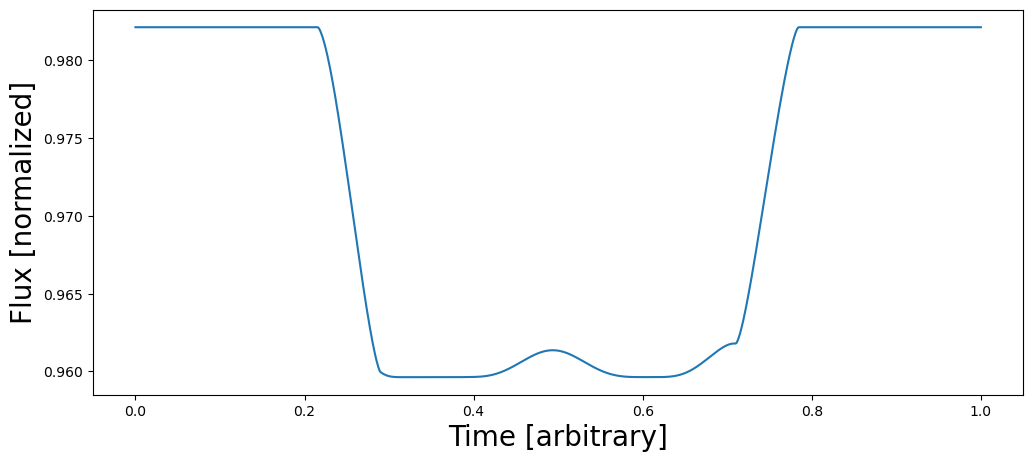

In [29]:
# Adding an occultor

# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.15

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_moon = map.flux(xo=xo, yo=yo, ro=ro, zo=zo)
plt.plot(time, flux_moon)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

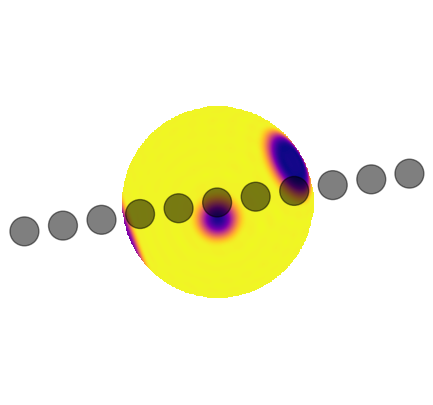

In [30]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)

Now the same but adding limb darkening

In [37]:
# Now let’s instantiate a very high degree map and add a spot with a contrast of 25% and a radius of 15∘ at latitude/longitude (0,0):

contrast = 0.25
radius = 15
map = starry.Map(ydeg=30,udeg=2)
map[1] = 0.05
map[2] = 0.15
# map.spot(contrast=contrast, radius=radius)
map.spot(contrast=0.25,radius=15,lat=-10.0,lon=0.0)
map.spot(contrast=0.20,radius=20,lat=-20.0,lon=240.0)
map.spot(contrast=0.15,radius=15,lat=20.0,lon=210.0)
map.spot(contrast=0.25,radius=20,lat=25.0,lon=60.0)


map.show(theta=np.linspace(0, 360, 50))

Text(0, 0.5, 'Flux [normalized]')

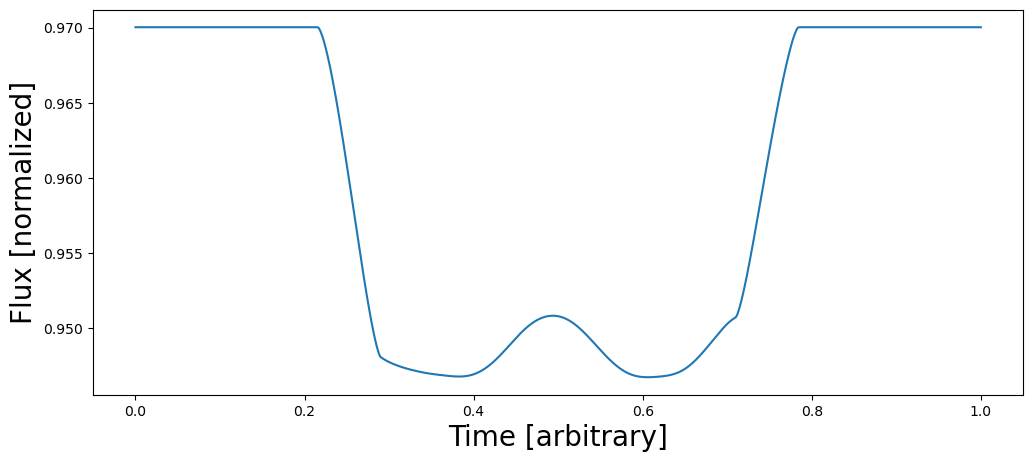

In [38]:
# Adding an occultor

# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.15

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_moon = map.flux(xo=xo, yo=yo, ro=ro, zo=zo)
plt.plot(time, flux_moon)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

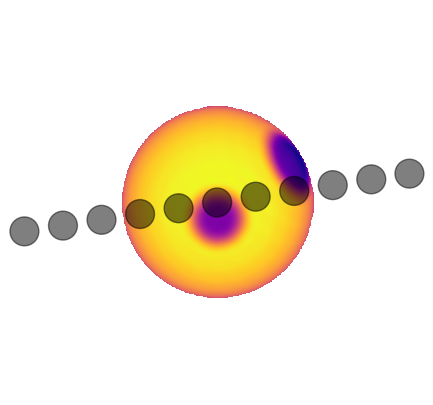

In [39]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)

Now using the system mode

In [61]:
#Creating a star
star = starry.Primary(starry.Map(ydeg=30, udeg=2, amp=1.0), m=1.0, r=1.0, prot=5.0)

star.map[1] = 0.1
star.map[2] = 0.2


# map.spot(contrast=contrast, radius=radius)
star.map.spot(contrast=0.25,radius=15,lat=-10.0,lon=0.0)
star.map.spot(contrast=0.20,radius=20,lat=-20.0,lon=240.0)
star.map.spot(contrast=0.15,radius=15,lat=20.0,lon=210.0)
star.map.spot(contrast=0.25,radius=20,lat=25.0,lon=60.0)


star.map.show(theta=np.linspace(0, 360, 50))

Text(0, 0.5, 'Flux [normalized]')

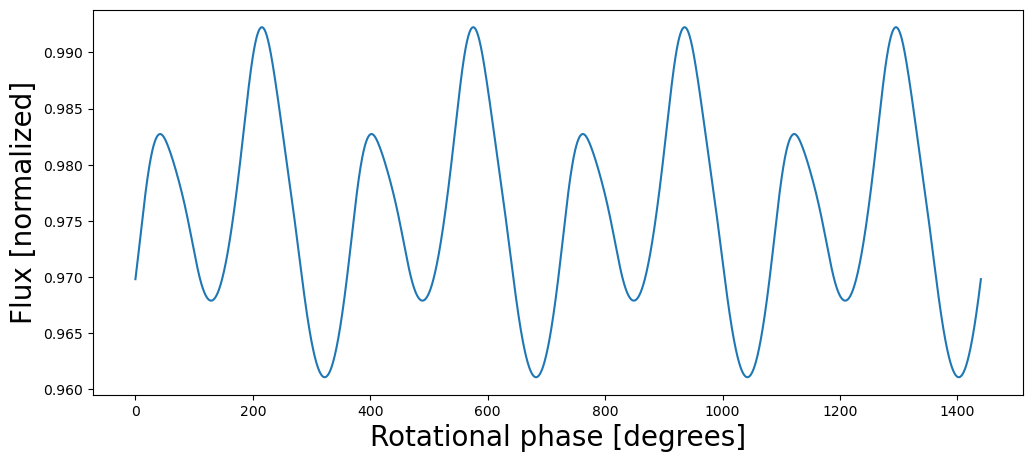

In [63]:
# calculate the flux of the star
theta = np.linspace(0, 360*4, 10000)
plt.figure(figsize=(12, 5))

flux_star_alone=star.map.flux(theta=theta)

plt.plot(theta, flux_star_alone)
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

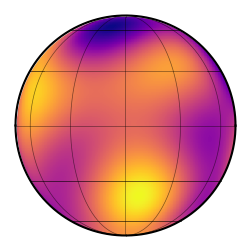

In [64]:
#Creating a planet - a hot jupiter in this case

planet = starry.kepler.Secondary(
    starry.Map(ydeg=5, amp=5e-3),  # the surface map
    m=0.1,  # mass in solar masses
    r=0.1,  # radius in solar radii
    porb=10.0,  # orbital period in days
    prot=1.0,  # rotation period in days (synchronous)
    Omega=30,  # longitude of ascending node in degrees
    ecc=0.3,  # eccentricity
    w=30,  # longitude of pericenter in degrees
    t0=0,  # time of transit in days
)

np.random.seed(123)
planet.map[1:, :] = 0.01 * np.random.randn(planet.map.Ny - 1)
planet.map.show()

In [67]:
#Creating a system
# system = starry.System(star, planet, texp=300/(24*3600))
system = starry.System(star, planet)

#time
time = np.linspace(-0.5, 20.5, 10000)
flux_system = system.flux(time)

Text(0, 0.5, 'system flux')

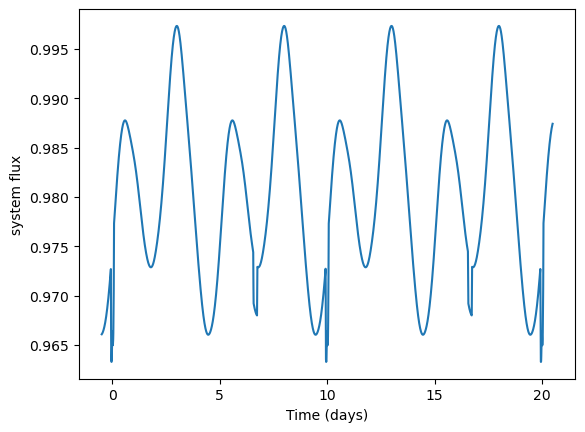

In [75]:
plt.plot(time, flux_system)
plt.xlabel("Time (days)")
plt.ylabel("system flux")

(9.5, 10.5)

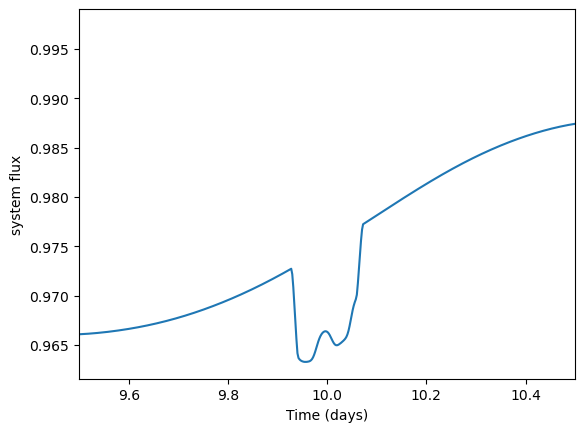

In [76]:
plt.plot(time, flux_system)
plt.xlabel("Time (days)")
plt.ylabel("system flux")

#set xlim
plt.xlim(9.5, 10.5)

In [77]:
flux_star, flux_planet = system.flux(time, total=False)

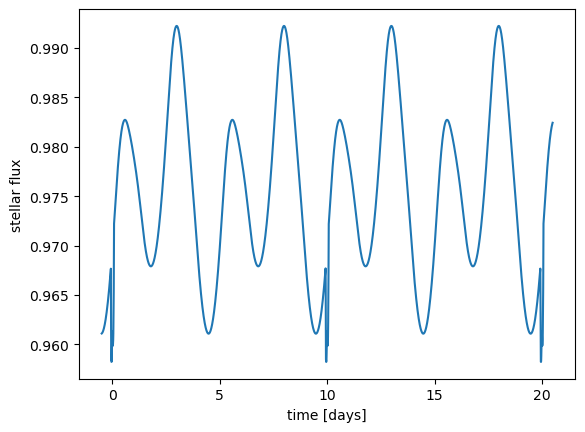

In [78]:
plt.plot(time, flux_star)
plt.xlabel("time [days]")
plt.ylabel("stellar flux");

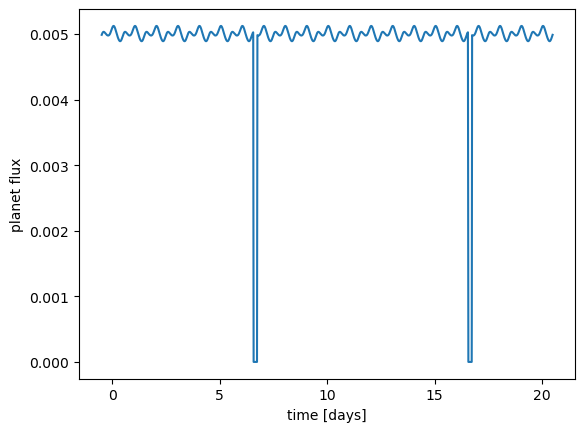

In [79]:
plt.plot(time, flux_planet)
plt.xlabel("time [days]")
plt.ylabel("planet flux");

Text(0, 0.5, 'y [R$_*$]')

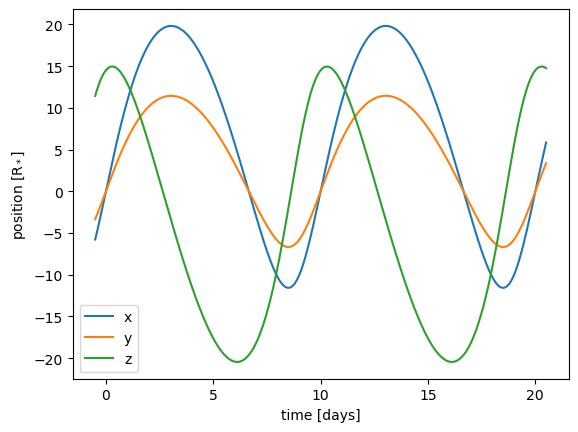

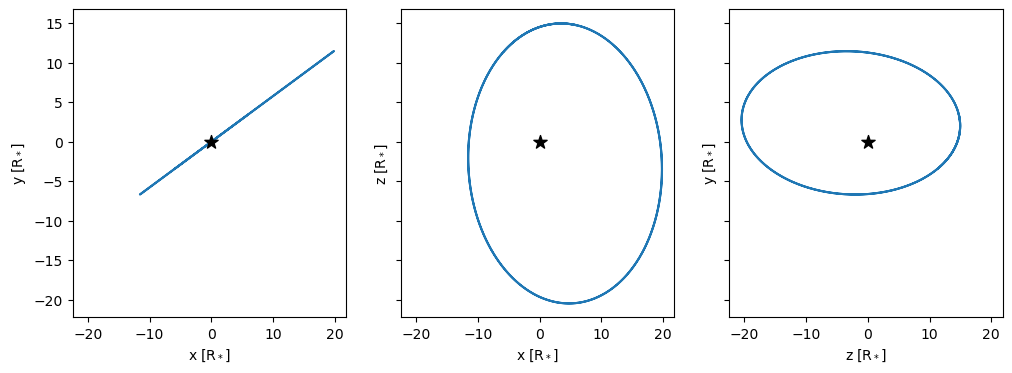

In [80]:
# Planets orbit

x, y, z = system.position(time)

plt.plot(time, x[1], label="x")
plt.plot(time, y[1], label="y")
plt.plot(time, z[1], label="z")
plt.ylabel("position [R$_*$]")
plt.xlabel("time [days]")
plt.legend()


fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
ax[0].plot(x[1], y[1])
ax[1].plot(x[1], z[1])
ax[2].plot(z[1], y[1])
for n in [0, 1, 2]:
    ax[n].scatter(0, 0, marker="*", color="k", s=100, zorder=10)
ax[0].set_xlabel(r"x [R$_*$]")
ax[0].set_ylabel(r"y [R$_*$]")
ax[1].set_xlabel(r"x [R$_*$]")
ax[1].set_ylabel(r"z [R$_*$]")
ax[2].set_xlabel(r"z [R$_*$]")
ax[2].set_ylabel(r"y [R$_*$]")

In [90]:
planet.r = 0.1
system.show(t=np.linspace(-1.5, 1.5, 150), window_pad=4, figsize=(8, 8))

In [91]:
planet.r = 0.1
system.show(t=np.linspace(-.5, .5, 50), window_pad=4, figsize=(8, 8))